# 3. Churn

## 3.1 Load data

In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.shape

(7043, 21)

In [63]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No


## 3.2 Preparing dataframe

In [64]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [65]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [66]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [67]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc.isnull().sum()

11

In [68]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [69]:
df.totalcharges = df.totalcharges.fillna(0)

In [70]:
df.totalcharges.iloc[488]

0.0

In [71]:
df['churn'] = (df.churn == 'yes').astype(int)

In [72]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

## 3.3 Setting up the validation framework

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [75]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [76]:
df_train = df_train.reset_index(drop=1)
df_val = df_val.reset_index(drop=1)
df_test = df_test.reset_index(drop=1)

In [77]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [78]:
df_train.drop('churn', axis=1, inplace=True)
df_val.drop('churn', axis=1, inplace=True)
df_test.drop('churn', axis=1, inplace=True)

## 3.4 EDA

In [79]:
df_full_train.reset_index(drop=1,inplace=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [80]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [81]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='Count'>

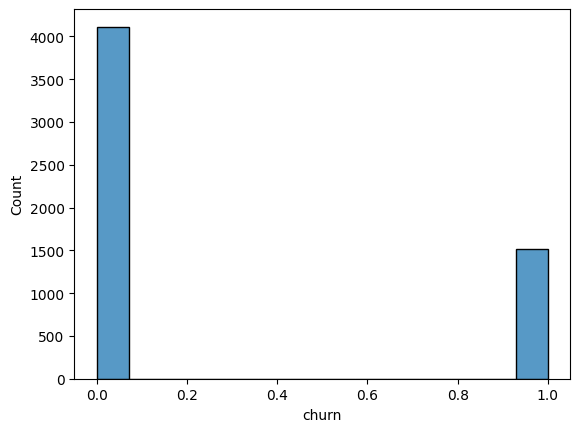

In [82]:
sns.histplot(df_full_train.churn)

In [83]:
df_full_train.churn.mean()

0.26996805111821087

In [84]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [85]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [86]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = []

for c in df_full_train.columns:
    if c not in numerical and c != 'customerid':
        categorical.append(c)

categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [87]:
# categorical.remove('customerid')

In [88]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [89]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
dtype: int64

## 3.5 Feature importance: Churn Rate and Risk Ratio

In [90]:
# churn rate

df_full_train[df_full_train.gender == 'female'].churn.mean()

0.27682403433476394

### Churn rate

<Axes: xlabel='gender', ylabel='Count'>

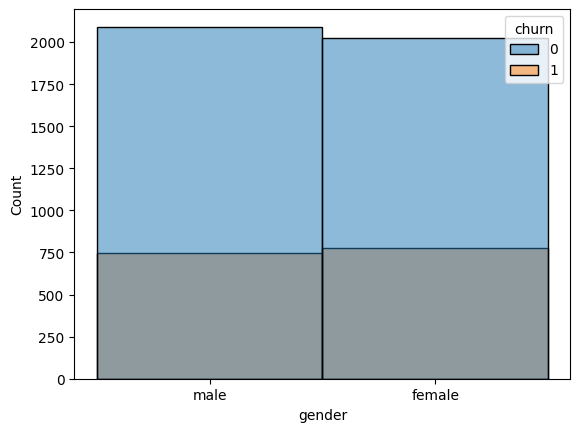

In [91]:
sns.histplot(data=df_full_train, x='gender', hue='churn')

In [92]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

print(churn_female, churn_male)

0.27682403433476394 0.2632135306553911


In [93]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [94]:
churn_no_partner = df_full_train[df_full_train.partner=='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [95]:
churn_partner = df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_partner

0.20503330866025166

In [96]:
global_churn - churn_partner

0.06493474245795922

### Risk ratio

In [97]:
churn_no_partner / global_churn

1.2216593879412643

In [98]:
churn_partner / global_churn

0.7594724924338315

In [99]:
from IPython.display import display

In [100]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
churn,,,,
0,0.0,4113,-0.269968,0.000000
1,1.0,1521,0.730032,3.704142


## 3.6 Feature importance: Mutual information

In [101]:
from sklearn.metrics import mutual_info_score

In [102]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [103]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [104]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

<Axes: >

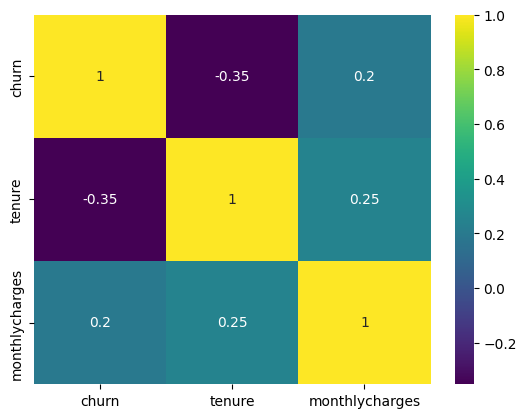

In [105]:
sns.heatmap(df_full_train[['churn','tenure','monthlycharges']].corr(), annot=True, cmap='viridis')

In [106]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [107]:
categorical_columns.remove('totalcharges')
categorical_columns.remove('churn')
categorical_columns.remove('customerid')
categorical_columns

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [108]:
df_full_train[categorical_columns].apply(mutual_info_churn_score)

gender              0.000117
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [109]:
mi = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

<Axes: >

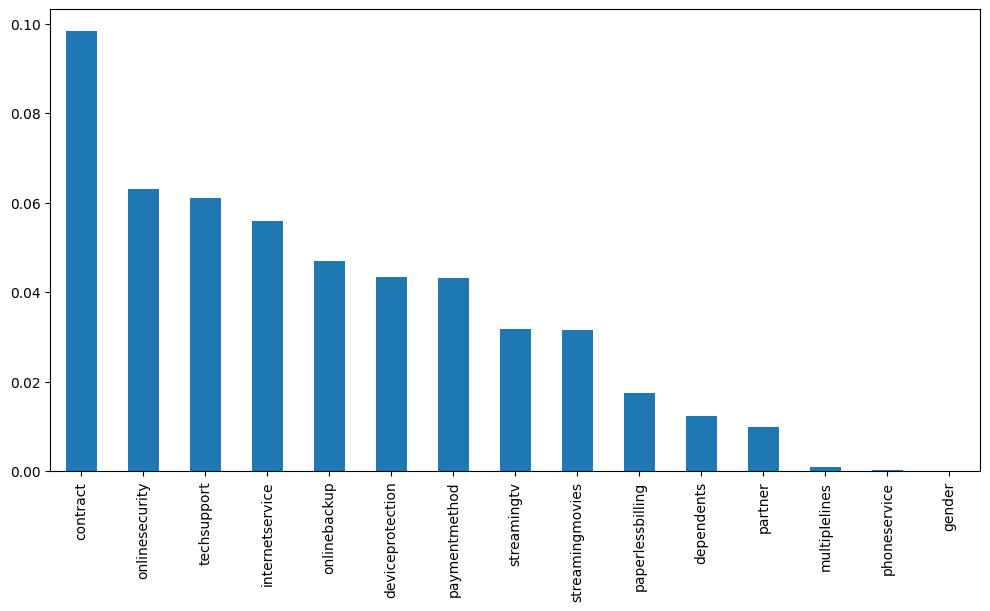

In [110]:
plt.figure(figsize=(12,6))
mi.sort_values(ascending=False).plot(kind='bar')

## 3.7 Feature importance: Correlation

In [111]:
df_full_train.tenure.max()

72

In [112]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [113]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [114]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [115]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

Text(0, 0.5, 'Probability of churn')

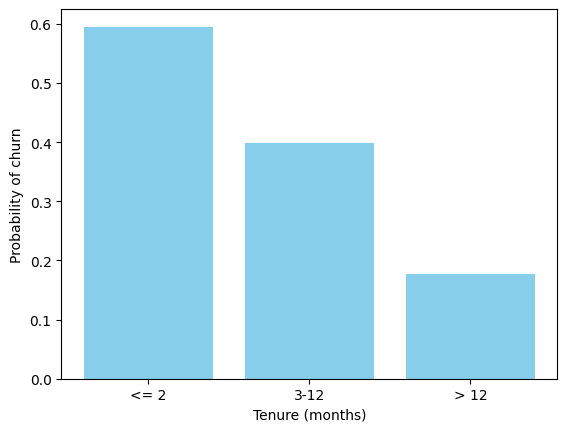

In [116]:
mean_churn = [
    df_full_train[df_full_train.tenure <= 2].churn.mean(),
    df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean(),
    df_full_train[df_full_train.tenure > 12].churn.mean()
]

tenure_groups = ['<= 2', '3-12', '> 12']

plt.bar(tenure_groups, mean_churn, color='skyblue')
plt.xlabel('Tenure (months)')
plt.ylabel('Probability of churn')

## 3.8 One-hot encoding

In [117]:
from sklearn.feature_extraction import DictVectorizer

In [118]:
categorical.remove('churn')

In [119]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[numerical + categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [120]:
val_dicts = df_val[numerical + categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [121]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [122]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

## 3.9 Logistic regression

In [123]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [124]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [125]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

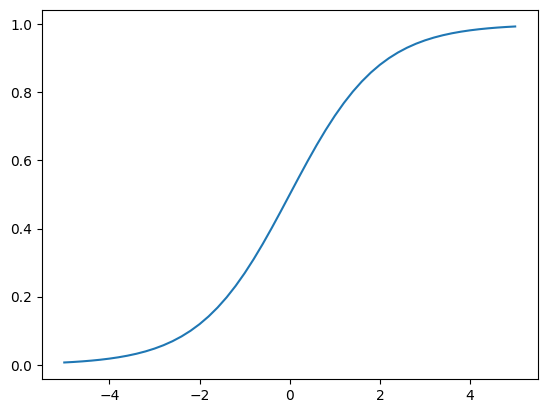

In [126]:
plt.plot(z, sigmoid(z))

In [127]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [128]:
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

In [129]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
model.intercept_[0]

-0.10903559412371769

In [132]:
# weights
model.coef_[0].round(2)

array([ 0.47, -0.17, -0.41, -0.03, -0.08,  0.06, -0.09, -0.08, -0.03,
       -0.07, -0.34,  0.32, -0.09,  0.  , -0.26,  0.14,  0.01,  0.06,
       -0.09, -0.08,  0.27, -0.09, -0.28, -0.23,  0.12, -0.17,  0.06,
       -0.09, -0.03,  0.07, -0.06,  0.14, -0.25,  0.22, -0.12, -0.09,
        0.1 , -0.07, -0.09,  0.05,  0.21, -0.09, -0.23, -0.07,  0.  ])

In [133]:
# "soft" predictions
model.predict_proba(X_train)

# LHS = probability of negative class (no churn)
# RHS = probability of positive class (churn)

array([[0.90452467, 0.09547533],
       [0.32068478, 0.67931522],
       [0.36633188, 0.63366812],
       ...,
       [0.46840576, 0.53159424],
       [0.957456  , 0.042544  ],
       [0.30128208, 0.69871792]])

In [134]:
# "hard" predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [135]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899715, 0.2045129 , 0.2122135 , ..., 0.13638718, 0.79975714,
       0.83739586])

In [136]:
threshold = 0.5

churn_decision = y_pred >= threshold
churn_decision

array([False, False, False, ..., False,  True,  True])

In [137]:
# people who are predicted to churn
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [138]:
# accuracy of our prediction

(y_val == churn_decision).mean() 

0.8034066713981547

In [139]:
df_pred = pd.DataFrame()

df_pred['probability'] = y_pred.round(2) # soft predictions
df_pred['threshold'] = threshold
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = (df_pred.prediction == df_pred.actual).astype(int)

df_pred

,probability,threshold,prediction,actual,correct
0,0.01,0.5,0,0,1
1,0.20,0.5,0,0,1
2,0.21,0.5,0,0,1
3,0.54,0.5,1,1,1
4,0.21,0.5,0,0,1
...,...,...,...,...,...
1404,0.31,0.5,0,0,1
1405,0.04,0.5,0,1,0
1406,0.14,0.5,0,0,1
1407,0.80,0.5,1,1,1


In [140]:
df_pred.correct.mean()

0.8034066713981547

In [141]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

In [147]:
a = [1,2,3]
b = 'abcd'
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [148]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(2)))

[('contract=month-to-month', 0.47),
 ('contract=one_year', -0.17),
 ('contract=two_year', -0.41),
 ('dependents=no', -0.03),
 ('dependents=yes', -0.08),
 ('deviceprotection=no', 0.06),
 ('deviceprotection=no_internet_service', -0.09),
 ('deviceprotection=yes', -0.08),
 ('gender=female', -0.03),
 ('gender=male', -0.07),
 ('internetservice=dsl', -0.34),
 ('internetservice=fiber_optic', 0.32),
 ('internetservice=no', -0.09),
 ('monthlycharges', 0.0),
 ('multiplelines=no', -0.26),
 ('multiplelines=no_phone_service', 0.14),
 ('multiplelines=yes', 0.01),
 ('onlinebackup=no', 0.06),
 ('onlinebackup=no_internet_service', -0.09),
 ('onlinebackup=yes', -0.08),
 ('onlinesecurity=no', 0.27),
 ('onlinesecurity=no_internet_service', -0.09),
 ('onlinesecurity=yes', -0.28),
 ('paperlessbilling=no', -0.23),
 ('paperlessbilling=yes', 0.12),
 ('partner=no', -0.17),
 ('partner=yes', 0.06),
 ('paymentmethod=bank_transfer_(automatic)', -0.09),
 ('paymentmethod=credit_card_(automatic)', -0.03),
 ('paymentmet

In [156]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')
# df_train[small].iloc[:10].to_dict()

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [163]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [164]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [165]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [166]:
X_train_small = dv_small.transform(dicts_train_small)
# X_val_small = dv_small.transform(dicts_val_small)

In [167]:
X_train_small.shape

(4225, 5)

In [168]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [171]:
w0 = model_small.intercept_[0]
w0

-2.47677566264226

In [174]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [181]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [183]:
sigmoid(-2.47 + 0.97 + 50 * .027 + 5*(-0.036))

0.41824062315816374

## 3.12 Using the model

In [189]:
dicts_df_full_train = df_full_train[numerical+categorical].to_dict(orient='records')
dicts_df_full_train

[{'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35,
  'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check'},
 {'tenure': 42,
  'monthlycharges': 73.9,
  'totalcharges': 3160.55,
  'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessb

In [190]:
dicts_df_full_train[0]

{'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': 258.35,
 'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check'}

In [191]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [192]:
y_full_train = df_full_train.churn.values

In [193]:
model = LogisticRegression().fit(X_full_train, y_full_train)
model

LogisticRegression()

In [194]:
dicts_test = df_test[numerical+categorical].to_dict(orient='records')
dicts_test

[{'tenure': 41,
  'monthlycharges': 79.85,
  'totalcharges': 3320.75,
  'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)'},
 {'tenure': 66,
  'monthlycharges': 102.4,
  'totalcharges': 6471.85,
  'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)'},
 {'tenu

In [195]:
X_test = dv.transform(dicts_test)

In [196]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [201]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False,  True])

In [202]:
# accuracy
(churn_decision == y_test).mean()

0.815471965933286

In [204]:
customer = dicts_test[10]
customer

{'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45,
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check'}

In [206]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [208]:
model.predict_proba(X_small)[0,1]

# 40% to churn = not likely

0.40568109778997524